# DS 2500 - Module Assignment 3

#Exploratory Data Analysis on Books and Goodreads Dataset.

Author: Prachi Aswani

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

import numpy as np
import pandas as pd
from scipy.stats import norm, t, gamma, probplot

# 1. Data Analysis Question



How does the average Goodreads rating of books correlate with their sales figures?

# 2. Read in the data



In [ ]:
# Reads the book sales dataset with all columns
books_df = pd.read_csv('https://raw.githubusercontent.com/harsh1399/DS2500-Data_Wrangling/main/Module_Assignment-3/Book_sales_and_Goodreads_ratings/combining-3-books.csv',
                       usecols=['title','author','language','year','copiesSold','genre'])

# Reads the Goodreads ratings dataset with all columns
goodreads_df = pd.read_csv('https://raw.githubusercontent.com/harsh1399/DS2500-Data_Wrangling/main/Module_Assignment-3/Book_sales_and_Goodreads_ratings/combining-3-goodreads.csv',
                           usecols = ['bookID','title','authors','average_rating','isbn','isbn13','language_code','  num_pages','ratings_count','text_reviews_count','publication_date','publisher'])

# 3. Check the packaging

Books dataset shape

In [ ]:
books_df.shape

(166, 6)

Goodreads dataset shape

In [ ]:
goodreads_df.shape

(11127, 12)

# 4. Look at the top and bottom of data

Books Dataset - top and bottom of data

In [ ]:
books_df.head()

,title,author,language,year,copiesSold,genre
0,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120 million[17][18],Fantasy
1,The Little Prince,Antoine de Saint-Exupéry,French,1943,100 million[19],Novella
2,Dream of the Red Chamber,Cao Xueqin,Chinese,1800,100 million[19],Family saga
3,The Hobbit,J. R. R. Tolkien,English,1937,100 million[19],Fantasy
4,And Then There Were None,Agatha Christie,English,1939,100 million[20],Mystery


In [ ]:
books_df.tail()

,title,author,language,year,copiesSold,genre
161,The Goal,Eliyahu M. Goldratt,English,1984,10 million[169],NaN
162,Fahrenheit 451,Ray Bradbury,English,1953,10 million[170],NaN
163,Angela's Ashes,Frank McCourt,English,1996,10 million[171],NaN
164,The Story of My Experiments with Truth (સત્યના...,Mohandas Karamchand Gandhi,Gujarati,1925,10 million[172],NaN
165,Bridget Jones's Diary,Helen Fielding,English,10,NaN,NaN


Goodereads Dataset - top and bottom of data

In [ ]:
goodreads_df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [ ]:
goodreads_df.tail()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
11122,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
11123,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
11124,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books
11125,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco
11126,45641,Las aventuras de Tom Sawyer,Mark Twain,3.91,8497646983,9788497646987,spa,272,113,12,5/28/2006,Edimat Libros


# 5. Data Combining

#Variables?
What variables do the two tables have in common that could be used as keys in a join?

In [ ]:
# Finds the intersection of columns between books_df and goodreads_df to use as a key
set(books_df.columns) & set(goodreads_df.columns)

{'title'}

In [ ]:
# Unique Titles in Books Dataset
"Books DataFrame - Unique Titles: {}".format(len(books_df['title'].unique()))

'Books DataFrame - Unique Titles: 166'

In [ ]:
# Unique Titles in Goodreads Dataset
"Goodreads DataFrame - Unique Titles: {}".format(len(goodreads_df['title'].unique()))

'Goodreads DataFrame - Unique Titles: 10351'

In [ ]:
in_books_but_not_goodreads_set = set(books_df['title']) - set(goodreads_df['title'])

in_goodreads_but_not_books_set = set(goodreads_df['title']) - set(books_df['title'])

print("There are {0} titles in books_df but not in goodreads_df.".format(len(in_books_but_not_goodreads_set)))

print("There are {0} titles in goodreads_df but not in books_df.".format(len(in_goodreads_but_not_books_set)))

There are 121 titles in books_df but not in goodreads_df.
There are 10306 titles in goodreads_df but not in books_df.


In [ ]:
# Number of unique tittles shared by both of the dataset
len(set(goodreads_df['title']) & set(books_df['title']))

45

# Coverage

Do both tables cover the same ranges of time?

In [ ]:
# Books dataframe year coverage
books_df['year'].min(), books_df['year'].max()

(10, 2018)

In [ ]:
# Goodreads dataframe year coverage

# Converts 'publication_date' column to datetime format
goodreads_df['publication_date'] = pd.to_datetime(goodreads_df['publication_date'], errors='coerce')

# Extracts the year component
goodreads_df['publication_year'] = goodreads_df['publication_date'].dt.year

# Finds the minimum and maximum publication years
min_year = goodreads_df['publication_year'].min()
max_year = goodreads_df['publication_year'].max()

print("Minimum publication year:", min_year)
print("Maximum publication year:", max_year)

Minimum publication year: 1900.0
Maximum publication year: 2020.0


# Duplicates

Are there instances of multiple/repeated rows of these key variables? why is that?

In [ ]:
# Books DataFrame Duplicates
books_df['title'].value_counts().head()

Harry Potter and the Philosopher's Stone             1
The Book Thief                                       1
Goodnight Moon                                       1
The Neverending Story (Die unendliche Geschichte)    1
Fifty Shades of Grey                                 1
Name: title, dtype: int64

In [ ]:
# Goodreads DataFrame Duplicates
goodreads_df['title'].value_counts().head()

The Iliad                 9
The Brothers Karamazov    9
'Salem's Lot              8
Gulliver's Travels        8
The Odyssey               8
Name: title, dtype: int64

#Strategy

What is the most appropriate merging strategy to handle the different time windows and repeated dates?

# Inner Join
An inner join strategy appears to be the most appropriate approach for merging the Books and Goodreads datasets, considering the differences in time windows and the presence of repeated titles. By performing an inner join, we ensure that only the titles present in both datasets are retained in the merged DataFrame, thereby focusing on the intersection of the keys from both datasets. In my analysis, I've considered the importance of comparing variables from both the Books and Goodreads datasets. Given this objective, it's crucial to focus on the intersection of titles present in both datasets. Opting for left or right joins would introduce a significant number of missing values, complicating the analysis and making it challenging to impute these missing values effectively. Additionally, using outer joins would retain all information from both datasets, potentially leading to a substantial amount of missing data. Moreover, the presence of missing values could affect the reliability of the analysis and subsequent visualizations, as pandas and plotting libraries often disregard NaN values.

# Expected Shape of the DataFrame after merging

What should the data look like afterwards? How many rows? How many columns? Which values should repeat? Which values should be null? Which values should disappear?

In [ ]:
"There are {0:,} rows in \"books_df\" and {1:,} rows in \"goodreads_df\"".format(len(books_df),len(goodreads_df))

'There are 166 rows in "books_df" and 11,127 rows in "goodreads_df"'

In [ ]:
"There are {0:,} unique titles in \"books_df\" and {1:,} unique titles in \"goodreads_df\"".format(len(books_df.title.unique()),len(goodreads_df.title.unique()))

'There are 166 unique titles in "books_df" and 10,351 unique titles in "goodreads_df"'

In [ ]:
"There are {0:,} columns in \"books_df\" and {1:,} columns in \"goodreads_df\"".format(len(books_df.columns),len(goodreads_df.columns))

'There are 6 columns in "books_df" and 13 columns in "goodreads_df"'

In [ ]:
# Finds common titles
common_titles = goodreads_df['title'].loc[goodreads_df['title'].isin(books_df['title'])]

print(len(common_titles))

83


There should be 6+13-1 = 18 columns and 83 rows. There should be no missing values as we are going to do an Inner join which only takes the intersection of both the dataframes.

# Merge

In [ ]:
# Performs an inner join
merged_inner_df = pd.merge(left = goodreads_df, right = books_df,
                                  left_on = 'title', right_on = 'title',
                                  how='inner')

print("There are {0:,} rows and {1:,} columns.".format(*merged_inner_df.shape))
print("There are {:,} unique values for \"title\" in the inner join.".format(len(merged_inner_df['title'].unique())))

There are 83 rows and 18 columns.
There are 45 unique values for "title" in the inner join.


# Checks the top and bottom of the merged dataframe

In [ ]:
merged_inner_df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,publication_year,author,language,year,copiesSold,genre
0,537,The Lovely Bones,Alice Sebold,3.81,0330485385,9780330485388,en-GB,328,6485,966,2003-06-01,Picador,2003.0,Alice Sebold,English,2002,10 million[154],NaN
1,538,The Lovely Bones,Alice Sebold,3.81,159413023X,9781594130236,en-US,532,367,73,2004-04-01,Large Print Press,2004.0,Alice Sebold,English,2002,10 million[154],NaN
2,15806,The Lovely Bones,Alice Sebold,3.81,0316168815,9780316168816,en-US,328,5945,735,2004-04-20,Back Bay Books,2004.0,Alice Sebold,English,2002,10 million[154],NaN
3,969,The Da Vinci Code,Dan Brown,3.84,076792603X,9780767926034,eng,467,1120,105,2006-03-28,Broadway Books,2006.0,Dan Brown,English,2003,80 million[25],Mystery thriller
4,4248,The Da Vinci Code,Dan Brown,3.84,1400079179,9781400079179,eng,489,13934,1459,2006-03-28,Anchor,2006.0,Dan Brown,English,2003,80 million[25],Mystery thriller


In [ ]:
merged_inner_df.tail()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,publication_year,author,language,year,copiesSold,genre
78,33288,How to Win Friends and Influence People,Dale Carnegie,4.19,0091906814,9780091906818,eng,268,1842,104,2006-04-06,Vermilion,2006.0,Dale Carnegie,English,1936,15 million[124],NaN
79,33291,How to Win Friends and Influence People,Dale Carnegie,4.19,0749307846,9780749307844,en-US,256,210,21,1994-03-31,Cedar Books,1994.0,Dale Carnegie,English,1936,15 million[124],NaN
80,39988,Matilda,Roald Dahl/Quentin Blake,4.31,0141301066,9780141301068,eng,240,541914,11576,1998-06-01,Puffin Books,1998.0,Roald Dahl,English,1988,17 million [113],NaN
81,44520,Matilda,Roald Dahl/Joely Richardson,4.31,0060582545,9780060582548,eng,5,56,18,2004-01-20,Festival Books,2004.0,Roald Dahl,English,1988,17 million [113],NaN
82,44528,Matilda,Roald Dahl/Rula Lenska/Sian Thomas/Christopher...,4.31,0141805625,9780141805627,eng,1,6,0,2005-03-03,Puffin Audiobooks,2005.0,Roald Dahl,English,1988,17 million [113],NaN


# 6. Data Cleaning

In [ ]:
# Number of missing values in each column
merged_inner_df.isnull().sum().sort_values(ascending=False)

genre                 54
title                  0
copiesSold             0
year                   0
language               0
author                 0
publication_year       0
publisher              0
publication_date       0
bookID                 0
ratings_count          0
  num_pages            0
language_code          0
isbn13                 0
isbn                   0
average_rating         0
authors                0
text_reviews_count     0
dtype: int64

In [ ]:
# Drop the genre column
merged_df = merged_inner_df.drop(columns=['genre'])

In [ ]:
# Ensuring genre column is dropped
merged_df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher', 'publication_year', 'author',
       'language', 'year', 'copiesSold'],
      dtype='object')

In [ ]:
# Examine unique values and data type in the 'average_rating' column
unique_copies_sold = merged_inner_df['average_rating'].unique()
print(unique_copies_sold)
print(merged_inner_df['average_rating'].dtype)

['3.81' '3.84' '3.91' '4.26' '3.77' '4.23' '4.27' '3.82' '3.96' '4.17'
 '3.99' '3.98' '3.88' '3.80' '4.11' '4.29' '4.15' '4.18' '4.01' '4.10'
 '3.89' '3.93' '4.25' '4.06' '3.64' '4.09' '4.03' '4.37' '4.22' '4.28'
 '4.19' '4.31']
object


In [ ]:
# Examines unique values and data type in the 'copiesSold' column
unique_copies_sold = merged_inner_df['copiesSold'].unique()
print(unique_copies_sold)
print(merged_inner_df['copiesSold'].dtype)

['10 million[154]' '80 million[25]' '10 million[166]'
 '20 million[101][102]' '13 million[57]' '11 million[144]'
 '40 million[51]' '20 million[99]' '33 million[61]' '50 million[41]'
 '25 million[74]' '10 million[170]' '15 million[126]' '10 million[151]'
 '30 million ("around")[65]' '26 million[citation needed]'
 '10 million[171]' '43 million [50]' '65 million [30]' '15 million[128]'
 '30 million[68]' '25 million[77]' '100 million[19]' '28 million[73]'
 '14 million[131]' '50 million[37]' '20 million[92]' '10.5 million[148]'
 '50 million[40]' '50 million[46]' '50 million[44]'
 '30 million (est.)[67]' '23 million[79]' '15 million[119]'
 '40 million [53]' '100 million[20]' '30 million (est.)[66]'
 '16 million [114]' '45 million[48][citation needed]' '20 million[105]'
 '21 million[82]' '20 million[86]' '16 million[116]' '15 million[124]'
 '17 million [113]']
object


In [ ]:
# Converts 'average_rating' column to numeric type
merged_df['average_rating'] = pd.to_numeric(merged_inner_df['average_rating'], errors='coerce')

# Checks the data type of 'average_rating' column after conversion
print(merged_df['average_rating'].dtype)

float64


In [ ]:
import re

# Defines a function to extract numeric values from the 'copiesSold' column
def extract_numeric(value):
    # Regular expression pattern to match numeric values
    pattern = r'\d+\.?\d*'  # Match one or more digits with an optional decimal point

    # Extracts numeric values using regular expression
    numeric_values = re.findall(pattern, str(value))

    # Converts extracted values to float and handle special cases
    if numeric_values:
        # Extracts the first numeric value
        numeric_value = float(numeric_values[0])

        # Converts million to actual number
        if 'million' in str(value):
            numeric_value *= 1000000  # 1 million = 1,000,000

        return numeric_value
    else:
        return None

# Applies the function to the 'copiesSold' column to create a new column 'copiesSold_numeric'
merged_df['copiesSold'] = merged_inner_df['copiesSold'].apply(extract_numeric)

# Displays the modified 'copiesSold of the DataFrame to verify the changes
print(merged_df['copiesSold'])
print(merged_df['copiesSold'].dtype)

0     10000000.0
1     10000000.0
2     10000000.0
3     80000000.0
4     80000000.0
         ...    
78    15000000.0
79    15000000.0
80    17000000.0
81    17000000.0
82    17000000.0
Name: copiesSold, Length: 83, dtype: float64
float64


In [ ]:
# Renames the 'copiesSold' column
merged_df.rename(columns={'copiesSold': 'copiesSold_in_millions'}, inplace=True)

In [ ]:
# Display the DataFrame with the changes
merged_df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,publication_year,author,language,year,copiesSold_in_millions
0,537,The Lovely Bones,Alice Sebold,3.81,0330485385,9780330485388,en-GB,328,6485,966,2003-06-01,Picador,2003.0,Alice Sebold,English,2002,10000000.0
1,538,The Lovely Bones,Alice Sebold,3.81,159413023X,9781594130236,en-US,532,367,73,2004-04-01,Large Print Press,2004.0,Alice Sebold,English,2002,10000000.0
2,15806,The Lovely Bones,Alice Sebold,3.81,0316168815,9780316168816,en-US,328,5945,735,2004-04-20,Back Bay Books,2004.0,Alice Sebold,English,2002,10000000.0
3,969,The Da Vinci Code,Dan Brown,3.84,076792603X,9780767926034,eng,467,1120,105,2006-03-28,Broadway Books,2006.0,Dan Brown,English,2003,80000000.0
4,4248,The Da Vinci Code,Dan Brown,3.84,1400079179,9781400079179,eng,489,13934,1459,2006-03-28,Anchor,2006.0,Dan Brown,English,2003,80000000.0


In [ ]:
merged_df.tail()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,publication_year,author,language,year,copiesSold_in_millions
78,33288,How to Win Friends and Influence People,Dale Carnegie,4.19,0091906814,9780091906818,eng,268,1842,104,2006-04-06,Vermilion,2006.0,Dale Carnegie,English,1936,15000000.0
79,33291,How to Win Friends and Influence People,Dale Carnegie,4.19,0749307846,9780749307844,en-US,256,210,21,1994-03-31,Cedar Books,1994.0,Dale Carnegie,English,1936,15000000.0
80,39988,Matilda,Roald Dahl/Quentin Blake,4.31,0141301066,9780141301068,eng,240,541914,11576,1998-06-01,Puffin Books,1998.0,Roald Dahl,English,1988,17000000.0
81,44520,Matilda,Roald Dahl/Joely Richardson,4.31,0060582545,9780060582548,eng,5,56,18,2004-01-20,Festival Books,2004.0,Roald Dahl,English,1988,17000000.0
82,44528,Matilda,Roald Dahl/Rula Lenska/Sian Thomas/Christopher...,4.31,0141805625,9780141805627,eng,1,6,0,2005-03-03,Puffin Audiobooks,2005.0,Roald Dahl,English,1988,17000000.0


# 5. Check the "n"s

The highest number of title repeated should be The Great Gatsby

In [ ]:
merged_df['title'].value_counts()

The Great Gatsby                           6
Charlotte's Web                            5
Pride and Prejudice                        5
Lolita                                     4
The Lovely Bones                           3
Fahrenheit 451                             3
James and the Giant Peach                  3
Matilda                                    3
Adventures of Huckleberry Finn             3
To Kill a Mockingbird                      3
The Hobbit                                 2
Watership Down                             2
Black Beauty                               2
The Outsiders                              2
And Then There Were None                   2
The Da Vinci Code                          2
Nineteen Eighty-Four                       2
The Tale of Peter Rabbit                   2
The Grapes of Wrath                        2
How to Win Friends and Influence People    2
Where the Wild Things Are                  1
The Book Thief                             1
The Godfat

There should be around 45 unique titles

In [ ]:
# Number of uniquue titles
unique_titles = len(set(merged_df['title']))
unique_titles

45

The most frequent rating should be 4.26 which occurs 7 times

In [ ]:
merged_df['average_rating'].value_counts()

4.26    7
4.17    7
3.91    6
4.27    5
4.18    4
3.89    4
4.23    4
3.96    4
3.99    4
3.81    3
4.01    3
4.31    3
3.82    3
4.09    2
4.19    2
4.29    2
3.84    2
4.37    2
3.80    2
4.06    2
3.88    1
4.28    1
4.22    1
4.03    1
4.25    1
3.64    1
3.93    1
3.77    1
4.10    1
3.98    1
4.11    1
4.15    1
Name: average_rating, dtype: int64

The total number of unique average ratings should be 32

In [ ]:
# Number of unique average_rating
len(set(merged_df['average_rating']))

32

The most frequent sales figure is 50000000.0 meaning 14 books have been sold with this sales figure.

In [ ]:
merged_df['copiesSold_in_millions'].value_counts()

50000000.0     14
20000000.0     11
30000000.0     10
10000000.0      9
15000000.0      7
100000000.0     4
40000000.0      4
28000000.0      3
17000000.0      3
25000000.0      2
80000000.0      2
16000000.0      2
45000000.0      2
33000000.0      1
43000000.0      1
65000000.0      1
11000000.0      1
13000000.0      1
14000000.0      1
10500000.0      1
23000000.0      1
21000000.0      1
26000000.0      1
Name: copiesSold_in_millions, dtype: int64

The total number of unique sales figures should be 23


In [ ]:
# Number of unique copiesSold
len(set(merged_df['copiesSold_in_millions']))

23

# 6. Validate against an external knowledge or data source



All the values of ISBN number is of length 10 only

In [ ]:
# Check ISBN lengths
valid_isbn = merged_df['isbn'].apply(lambda x: len(str(x)) == 10)

# Check if all values in valid_isbn are True
if valid_isbn.all():
    print("All values in the 'ISBN' column are length of 10.")
else:
    print("There are invalid values in the 'ISBN' column.")


All values in the 'ISBN' column are length of 10.


All the values in ISBN 13 are of length 13 only

In [ ]:
# Check isbn13 lengths
valid_isbn13 = merged_df['isbn13'].apply(lambda x: len(str(x)) == 13)

# Check if all values in valid_isbn13 are True
if valid_isbn13.all():
    print("All values in the 'ISBN' column are length of 13.")
else:
    print("There are invalid values in the 'ISBN' column.")

All values in the 'ISBN' column are length of 13.


The year is positive

In [ ]:
# Check if year is positive
merged_df['year'].min()

1813

Is the distribution of copiesSold_in_millions typical?

In [ ]:
merged_df['copiesSold_in_millions'].describe()

count    8.300000e+01
mean     3.254819e+07
std      2.224649e+07
min      1.000000e+07
25%      1.600000e+07
50%      2.800000e+07
75%      4.750000e+07
max      1.000000e+08
Name: copiesSold_in_millions, dtype: float64

The distribution of copiesSold_in_millions appears to be right-skewed based on the summary statistics. The mean value of approximately 32.55 million copies sold is higher than the median value of 28 million copies sold. Additionally, the standard deviation is relatively large at approximately 22.25 million, indicating a wide dispersion of data points around the mean. Furthermore, the minimum value of 10 million copies sold and the maximum value of 100 million copies sold suggest a wide range of values, with some books achieving significantly higher sales figures than others.

# 7. Make a plot


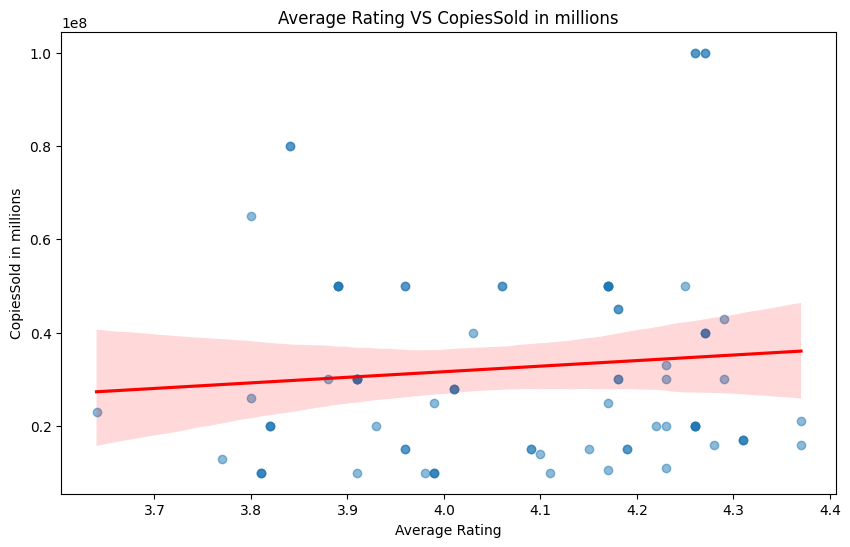

In [ ]:
# Regression Plot
plt.figure(figsize=(10, 6))
sb.regplot(x='average_rating', y='copiesSold_in_millions', data=merged_df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Average Rating VS CopiesSold in millions')
plt.xlabel('Average Rating')
plt.ylabel('CopiesSold in millions')
plt.show()

# 8. Try an easy solution

Normal test

Normal Probabilit Plot

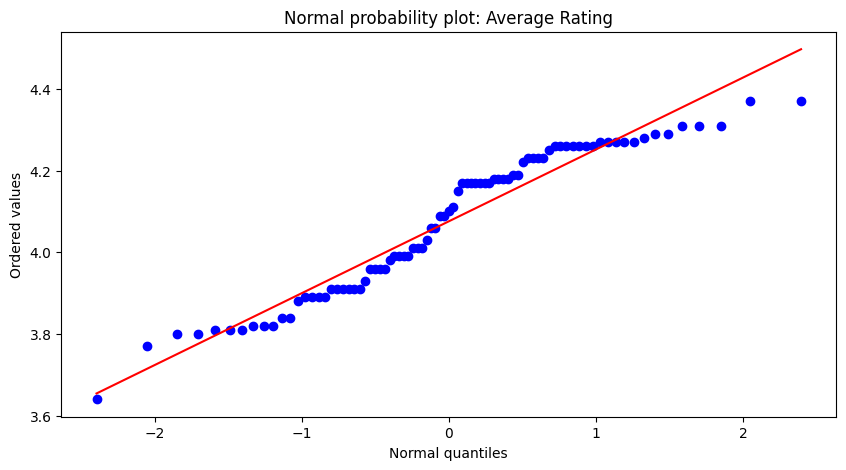

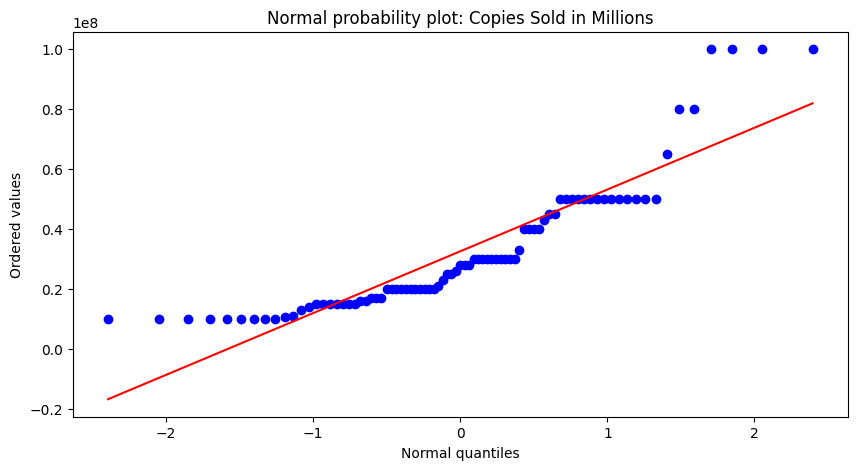

In [ ]:
# Extracts the columns check for normality from merged_df
average_rating_column = merged_df['average_rating']
copies_sold_column = merged_df['copiesSold_in_millions']

# Plots the normal probability plot for 'average_rating'
plt.figure(figsize=(10, 5))
probplot(average_rating_column, plot=plt)
plt.title("Normal probability plot: Average Rating")
plt.xlabel("Normal quantiles")
plt.ylabel("Ordered values")
plt.show()

# Plots the normal probability plot for 'copiesSold_in_millions'
plt.figure(figsize=(10, 5))
probplot(copies_sold_column, plot=plt)
plt.title("Normal probability plot: Copies Sold in Millions")
plt.xlabel("Normal quantiles")
plt.ylabel("Ordered values")
plt.show()

# Pearson's Correlation Coefficient Test

Are these statistically significant

Hypothesis testing using Pearson Correlation Coefficient

Two Tailed Test
$$
H_0: \text{No correlation between the average rating of books and their sales figure, i.e., $p=0$}.
$$
$$
H_a: \text{Some correlation between the average rating of books and their sales figure, i.e., $p≠0$}.
$$

Significance level is 5%(0.05)

In [ ]:
from scipy.stats import pearsonr

# Extracts relevant columns
average_rating = merged_df['average_rating']
copies_sold = merged_df['copiesSold_in_millions']

# Performs Pearson correlation
correlation, p_value = pearsonr(average_rating, copies_sold)

# Displays results
print('Correlation: {}'.format(correlation))
print('P value: {}'.format(p_value))

Correlation: 0.0957356204685286
P value: 0.38926806998456914


From the correlation coefficient (r), There is a weak positive correlation of approximately 0.096 between the average rating of books and their sales figure. The positive sign indicates that as the average rating increases, the sales figure tends to increase slightly, but the correlation is not very strong. Additionally, the p-value associated with the correlation coefficient is 0.389, which is greater than the significance level of 0.05. Therefore, we fail to reject the null hypothesis, suggesting that there is insufficient evidence to conclude a significant correlation between the average rating of books and their sales figure.There is a statistically no significant correlation between the average rating of the books and their sales figure.

# Write Up

Exxploratory Data Analysis on on Books and Goodreads Dataset.

The choice of datasets was determined by several factors.
Goodreads serves as a widely used platform where book enthusiasts rate and review books, offering a rich source of user-generated data on book quality and popularity. Combining this dataset with information on book sales provides a comprehensive view of the factors influencing book success, crucial for addressing my research question regarding the correlation between Goodreads ratings and book sales. With over 11,000 entries in the Goodreads dataset and 166 records in the Books dataset, I have a substantial amount of data to work with. This size not only allows for robust statistical analysis but also ensures that I can uncover meaningful patterns and trends in the data. Analyzing the relationship between Goodreads ratings and book sales can offer valuable insights for authors, publishers, and the broader publishing industry.

The primary question for my analysis is: How does the average Goodreads rating of books correlate with their sales figures? This question aligns with the datasets on Books and Goodreads, which provide comprehensive information on book titles, authors, ratings, and sales figures. By exploring the relationship between Goodreads ratings and book sales, I aim to uncover insights into the factors influencing the success of books in the market. This analysis is motivated by the desire to understand the impact of reader perceptions on book sales, offering valuable insights for authors, publishers, and the broader publishing industry. The datasets I will combine to answer this question consist of the Books Dataset and the Goodreads Dataset. The Books Dataset provides information on various books, including their titles, authors, publication years, languages, genres, and sales figures. This dataset serves as the primary source of sales data, offering insights into how different books perform in terms of their sales. On the other hand, the Goodreads Dataset contains data gathered from the Goodreads platform, a popular platform where readers rate and review books. It includes details such as book titles, authors, average ratings, ratings counts, and text reviews. By merging these datasets based on common variables like book titles, I can explore the relationship between Goodreads ratings and book sales figures. This combined dataset will enable me to analyze whether books with higher Goodreads ratings tend to have correspondingly higher sales figures. In essence, the merged dataset will allow me to investigate how reader feedback, as reflected in Goodreads ratings, influences the sales performance of books.

Upon examining the packaging the shape and delving into the top and bottom entries of both datasets, I gained valuable insights into the scope and content of the data. In the Books Dataset, which consists of 166 entries and 6 columns, I observed a diverse range of book titles, authors, publication years, and genres. Similarly, exploring the Goodreads Dataset with its 11,127 entries and 12 columns revealed a comprehensive collection of book-related information. From book IDs and titles to average ratings, ISBNs, and publication dates, each entry offered a wealth of details about a wide array of books. In exploring the possibility of combining the Books and Goodreads datasets, I identified "title" as the common variable shared between the two tables that could serve as a key in a join operation. With 45 unique titles shared between both datasets, I recognized the potential for merging them based on this key to enrich the analysis. However, upon further examination, I discovered some disparities between the datasets. While there were 121 titles present in the Books dataset that were not found in the Goodreads dataset, conversely, there were 10,306 titles in the Goodreads dataset that did not have corresponding entries in the Books dataset. This discrepancy suggests variations in the coverage and scope of the two datasets, which may impact the completeness of the merged dataset. Furthermore, I investigated the temporal coverage of both datasets to ensure alignment in terms of publication years. The Books dataset spans from the year 10 to 2018, whereas the Goodreads dataset encompasses publications from 1900 to 2020. While both datasets cover a wide range of years, there may be instances where publications overlap or diverge, instigating careful consideration during the merging process to maintain data integrity. Additionally, I examined the presence of duplicate entries based on the key variable "title" in both datasets. While the Books DataFrame showed no instances of repeated titles, the Goodreads DataFrame exhibited multiple occurrences of certain titles, such as "The Iliad" and "The Brothers Karamazov," suggesting potential data redundancy or variations in editions.

Books dataset provides information about various books, including their titles, authors, publication years, publishers, and other details related to the books themselves. On the other hand, the Goodreads dataset offers insights from a different perspective, focusing more on user interactions and ratings for the books listed. It includes details such as average ratings, ratings count, and text reviews count, providing a glimpse into how readers perceive and engage with the books. The common key used for joining the data from both datasets was the 'title' of the books. This key allowed for a straightforward merge based on the book titles present in both datasets. The inner join was chosen as the merging strategy because it retains only the keys present in both datasets, ensuring that only the data common to both perspectives is included in the merged dataset. This approach is suitable when focusing on the intersection of the keys from both datasets and helps minimize missing values. Both datasets cover different ranges of time. While the "Books" dataset spans from the year 10 to 2018, the "Goodreads" dataset covers publication years from 1900 to 2020. This variation in time ranges highlights the different perspectives offered by each dataset. Both datasets contain instances of duplicate titles. However, these duplicates are expected, given the nature of book listings and reviews, where multiple editions or versions of the same book may exist. An inner join strategy appears to be the most appropriate approach for merging the Books and Goodreads datasets, considering the differences in time windows and the presence of repeated titles. By performing an inner join, we ensure that only the titles present in both datasets are retained in the merged DataFrame, thereby focusing on the intersection of the keys from both datasets. In my analysis, I've considered the importance of comparing variables from both the Books and Goodreads datasets. Given this objective, it's crucial to focus on the intersection of titles present in both datasets. Opting for left or right joins would introduce a significant number of missing values, complicating the analysis and making it challenging to impute these missing values effectively. Additionally, using outer joins would retain all information from both datasets, potentially leading to a substantial amount of missing data. Moreover, the presence of missing values could affect the reliability of the analysis and subsequent visualizations, as pandas and plotting libraries often disregard NaN values.The inner join operation will produce a merged dataset containing information exclusively from titles that exist in both the Books and Goodreads datasets. While this may result in a smaller sample size compared to other merging strategies, it ensures that our analysis is based on a cohesive dataset with minimal missing data.  Therefore, despite the drawback of resulting in a smaller sample size, an inner join emerges as the most suitable merging strategy. By prioritizing the common titles between the datasets, an inner join ensures data consistency and facilitates a straightforward comparison of variables, enabling me to draw meaningful insights with confidence. The inner join successfully merged the datasets based on the common key, resulting in a dataset with 83 rows and 18 columns. While the approach effectively minimized missing values and retained data common to both datasets, it also led to a reduced sample size due to the exclusion of non-matching titles. One limitation of this approach is that it may overlook valuable insights present in unique titles exclusive to each dataset. In conclusion, the combined dataset provides a comprehensive perspective by integrating book details with reader feedback. However, researchers should be mindful of the limitations and biases introduced by the merging process and interpret the results accordingly.

After merging the Books and Goodreads datasets using an inner join, the resulting DataFrame is expected to have 18 columns and 83 rows. This calculation is based on the fact that the Books dataset has 6 columns, the Goodreads dataset has 13 columns, and the 'title' column, which is common to both datasets, will be included only once in the merged DataFrame. Since we are performing an inner join, which retains only the intersection of the two datasets, there should be no missing values in the merged DataFrame. Each row in the merged DataFrame will represent a unique title that is common to both datasets, with corresponding values from both datasets aligned based on the shared 'title' column. Values from non-matching titles in either dataset will not be included in the merged DataFrame, resulting in a more focused dataset that facilitates direct comparisons between the shared titles.

In the process of data cleaning, I meticulously examined the dataset to ensure its accuracy and suitability for analysis. First, I checked for missing values in each column using the `isnull().sum()` method. It became apparent that the 'genre' column had a considerable number of missing values, totaling 54. Considering the impact of missing data on analysis outcomes, I made the decision to drop the 'genre' column from the merged DataFrame ('merged_df'). This decision was informed by several factors. As I reviewed the dataset, I realized that including redundant information could lead to unnecessary data duplication and increased memory usage without providing additional insights. Since the 'genre' information was already available in one of the original DataFrames ('books_df'), its presence in the merged DataFrame seemed redundant. By removing redundant columns like 'genre', I aimed to streamline the dataset and improve its clarity. Furthermore, I focused on the analysis objectives, which primarily revolved around exploring the relationship between Goodreads ratings and book sales figures. In this context, the 'genre' column may not directly contribute to addressing the research questions. Thus, dropping irrelevant columns allowed me to concentrate on variables directly relevant to the research objectives, enhancing the analysis's focus and effectiveness. Consistency across the dataset was another crucial consideration. By removing the 'genre' column from the merged DataFrame, I ensured a consistent structure, aligning with the organization of the original DataFrames.
I. Subsequently, I addressed data types, particularly converting the 'average_rating' column to numeric type using the 'pd.to_numeric' function. This conversion ensures that numeric values in the 'average_rating' column are accurately represented for analysis. Another crucial step involved handling the 'copiesSold' column, which contained entries in string format, including mentions of million. To address this, I defined a function to extract numeric values from the 'copiesSold' column using regular expressions. This function converted mentions of million to actual numeric values, ensuring consistency in representation. After applying the function to create a new column 'copiesSold_in_millions', I verified the changes by examining the modified DataFrame. Finally, I renamed the 'copiesSold' column to 'copiesSold_in_millions' for clarity and consistency in column naming conventions. Overall, these cleaning steps were pivotal in preparing the dataset for further analysis. By addressing missing values, removing redundant columns, and ensuring consistency in data types, we created a cleaned dataset ready for exploration and insights into the relationship between Goodreads ratings and book sales figures.

Next, I started checking the N's of the dataset. In checking the data, I observed that the highest number of repeated titles should be "The Great Gatsby," which appeared six times in the dataset. This title repetition was followed closely by "Charlotte's Web" and "Pride and Prejudice," each appearing five times. Additionally, the dataset contained a total of 45 unique titles, as expected. Moving on to the average ratings, the most frequent rating was 4.26, occurring seven times, followed by several ratings with seven occurrences as well. The dataset included a total of 32 unique average ratings. Regarding sales figures, the most frequent sales figure was 50,000,000 (in millions), indicating that 14 books had been sold with this sales figure. The dataset encompassed a total of 23 unique sales figures. These checks ensure the integrity and consistency of the dataset, providing insights into the distribution of titles, average ratings, and sales figures. Such validations are crucial for ensuring the accuracy and reliability of subsequent analyses and interpretations. In validating against external knowledge or data sources, I verified that all the values in the 'ISBN' column are of length 10, which aligns with the typical length of ISBN numbers. Similarly, all values in the 'ISBN13' column are of length 13, consistent with the standard length of ISBN-13 numbers. Additionally, I checked that the 'year' column,is all positive, with the earliest year being 1813. Next, I examined the distribution of 'copiesSold_in_millions' to determine its typicality. The summary statistics revealed that the distribution is right-skewed, as evidenced by the mean of approximately 32.55 million copies sold being greater than the median of 28 million copies sold. The standard deviation of approximately 22.25 million indicates a wide dispersion of data points around the mean. The range of sales figures, from 10 million to 100 million copies sold, further supports the variability in sales across the dataset, with some books achieving significantly higher sales figures than others. Overall, the distribution of 'copiesSold_in_millions' appears to align with expectations for book sales data, considering the varying popularity and success of different titles in the market.

The visualization I chose for exploring the relationship between average rating and copies sold is a regression plot.Firstly, a regression plot allowed me to visually assess the presence and strength of any linear relationship between two continuous variables, which in this case are average rating and copies sold. By plotting the data points and fitting a regression line, I could visually identify any patterns or trends in the relationship.Secondly, the plot provided a clear representation of the data distribution and the regression line, making it easy to interpret the relationship between average rating and copies sold. The scatterplot of data points helped visualize the spread of observations across different rating and their corresponding sales, while the regression line provided a concise summary of the overall trend. The plot I did clearly indicates there's a positive weak relationship between average rating of the books and their sales. The points are spread widely on the plot. Additionally, the scatter plot allows me to identify any outliers or anomalies in the data distribution, which could be crucial for identifying bestselling books or understanding factors influencing sales performance. Overall, this visualization not only validates hypotheses but also offers actionable insights for publishers, marketers, and authors looking to understand the relationship between book ratings and sales.

The normal probability plots for both the 'average_rating' and 'copiesSold_in_millions' columns from the dataset are presented above. These plots are a simple yet effective way to visually assess whether the data follows a normal distribution. In each plot, the data points are compared against the normal quantiles of a normal distribution.
For the 'average_rating' column, the normal probability plot shows that the data points roughly follow a straight line, indicating that the distribution of average ratings is approximately normal. However, there are some deviations from the straight line towards the tails, suggesting potential departures from normality. Similarly, for the 'copiesSold_in_millions' column, the normal probability plot also exhibits a roughly linear relationship between the data points and the normal quantiles its ROUGHLY linear not exactly. However, there are slight deviations from linearity, particularly towards the upper end of the distribution, indicating potential deviations from normality.Hence, the both of them are normally distributed. Overall, these easy-to-generate normal probability plots provide a quick visual assessment of the normality of the data distributions.

The Pearson correlation coefficient test was conducted to determine whether there is a statistically significant relationship between the average rating of books and their sales figures. I chose to conduct the Pearson correlation coefficient test to examine the relationship between the average rating of books and their sales figures in our dataset. This statistical method is a standard approach for assessing the strength and direction of linear associations between continuous variables. By using this test, I aimed to determine whether there exists a significant correlation between these two variables and to what extent they are related. The decision to employ the Pearson correlation coefficient was based on its suitability for analyzing linear relationships, its widespread acceptance in statistical analysis, and its straightforward interpretation.This test is used to assess the strength and direction of the linear relationship between two continuous variables which for this case is average rating and copies sold. In this test, the null hypothesis (H0) states that there is no correlation between the average rating of books and their sales figure, implying that the correlation coefficient (ρ) equals zero. The alternative hypothesis (Ha) suggests that there is some correlation between these variables, indicating that the correlation coefficient is not equal to zero. The significance level chosen for this test is 0.05, which means that there is a 5% chance of rejecting the null hypothesis when it is actually true. If the p-value associated with the correlation coefficient is less than 0.05, then we reject the null hypothesis and conclude that there is a statistically significant correlation. In this case, the calculated correlation coefficient is approximately 0.096, indicating a weak positive correlation between the average rating of books and their sales figure. The positive sign suggests that as the average rating increases, the sales figure tends to increase slightly. However, the correlation is not very strong.Furthermore, the p-value associated with the correlation coefficient is 0.389, which is greater than the significance level of 0.05. Therefore, we fail to reject the null hypothesis and conclude that there is insufficient evidence to support a significant correlation between the average rating of books and their sales figure. In other words, there is a statistically non-significant correlation between these variables.

Reflection about data triangulation :

MA3 -
Data triangulation involves using multiple sources or methods to corroborate findings or draw conclusions, enhancing the validity and reliability of the analysis. In Module Assignment 3 (MA3), the use of Goodreads and Books datasets presents an opportunity for data triangulation, enhancing the depth and reliability of the analysis. Goodreads provides insights into user ratings, reviews, and engagement with books, while the Books dataset offers detailed information about book titles, authors, publication years, and other attributes. By combining these datasets, we can triangulate their findings and validate conclusions through multiple sources, thereby strengthening the robustness of their analysis. However, the use of Goodreads and Books datasets also raises privacy considerations that must be addressed. Goodreads, as a platform for book enthusiasts, contains user-generated content such as reviews and ratings, which may include personal opinions and preferences. While user identities may be anonymized, there is still a risk of inadvertently revealing sensitive information or violating user privacy if data handling practices are not carefully implemented. Similarly, the Books dataset may contain sensitive information about authors, publishers, and publication details, which could pose privacy risks if not adequately protected. Combining these datasets increases the potential for privacy breaches or unauthorized access to personal information, highlighting the importance of implementing stringent data protection measures and adhering to privacy regulations.
To address privacy concerns in MA3, we could try Anonymizing Personal Information. Removing or anonymizing personally identifiable information (PII) from the datasets to minimize the risk of re-identification. This may involve replacing user identifiers with anonymous tokens or aggregating data to preserve privacy.Using encrypted channels for transmitting and storing data to prevent unauthorized access or interception. Implementing secure storage practices and access controls to restrict data access to authorized personnel only. Another way would be to obtain informed consent. If the research involves collecting or analyzing user-generated content from Goodreads, obtain informed consent from users regarding the use of their data for research purposes. Clearly communicate the intended use of data and provide options for users to opt out or withdraw consent. Another not so preffered way would be to use less data which personally I find it to be not ideal. By proactively addressing privacy considerations and implementing robust data protection measures, we can leverage the Goodreads and Books datasets for data triangulation in MA3 while safeguarding user privacy and upholding ethical standards.

**Data Triangulation in Healthcare:**

In healthcare, data triangulation involves integrating data from multiple sources such as electronic health records (EHRs), medical imaging and population health data. By combining information from diverse sources, researchers and healthcare professionals can gain a more comprehensive understanding of diseases, treatment outcomes, and public health trends. For example, researchers might combine EHR data with genetic information to identify genetic markers for certain diseases or combine clinical trial data with real-world evidence to assess the effectiveness of treatments in broader patient populations. This could create potential privacy issues. Healthcare data often contain sensitive personal information such as medical history, diagnoses, and treatments. Protecting patient privacy is paramount to maintaining trust in the healthcare system. Data breaches or unauthorized access to patient data can lead to identity theft, discrimination, and other harms. Therefore, robust data security measures such as encryption, access controls, and audit trails are essential to safeguard patient privacy.Sharing healthcare data for research purposes requires obtaining informed consent from patients. However, obtaining meaningful consent can be challenging due to the complexity of healthcare data and the wide range of potential uses. Patients may not fully understand how their data will be used or may have concerns about privacy and confidentiality. Therefore, clear and transparent communication about data use, privacy protections, and the benefits of research is essential to ensure informed consent.
Healthcare data collected for clinical purposes may be repurposed for research or commercial use. While secondary use of data can accelerate medical discovery and innovation, it also raises privacy concerns. Patients may not be aware of or consent to the secondary use of their data, leading to ethical questions about data ownership, control, and consent.Addressing these privacy issues requires a combination of technical, legal, and ethical measures. Strong data governance frameworks, privacy regulations (e.g., HIPAA in the United States, GDPR in the European Union), and ethical guidelines help ensure that healthcare data are used responsibly, ethically, and in accordance with patient rights.